# Vehicle Price Prediction Dataset

In [149]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


df_original=pd.read_csv('dataset/vehicle_price.csv')
df=pd.read_csv('dataset/vehicle_price.csv')
print(df.shape)
print(df.info())
df.describe()

(1002, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [164]:
df.head()

,name,description,make,model,year,price,engine,cylinders,mileage,trim,...,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive,vehicle_age,mileage_per_year,is_new,cyl_category,is_luxury
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",0.229386,Wagoneer,0.267279,74600.0,24V GDI DOHC Twin Turbo,0.84957,-0.111500,1.040798,...,True,False,True,False,False,-0.267279,-0.117340,-0.079514,Medium,0.0
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,0.229386,Grand Cherokee,0.267279,50170.0,OHV,0.84957,-0.129219,-0.277508,...,True,False,True,False,False,-0.267279,-0.139843,-0.079514,Medium,0.0
2,2024 GMC Yukon XL Denali,Not available,-0.670874,Yukon XL,0.267279,96410.0,"6.2L V-8 gasoline direct injection, variable v...",2.34375,-0.131188,-0.946802,...,True,False,True,False,False,-0.267279,-0.142343,-0.079514,High,0.0
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,-0.970961,Durango,-3.182061,46835.0,16V MPFI OHV,2.34375,-0.068187,0.270096,...,True,False,False,False,False,3.182061,-0.102338,-0.079514,High,0.0
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,1.429732,3500,0.267279,81663.0,24V DDI OHV Turbo Diesel,0.84957,-0.111500,-0.338353,...,False,False,True,False,False,-0.267279,-0.117340,-0.079514,Medium,0.0


### Handling missing value

In [151]:
print(df.isnull().sum())

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


In [152]:
# df['description']=df['description'].fillna("Not available")
df.fillna({'description':'Not available'},inplace=True)
# we are using these methods because this are the one which are supported in pandas 3



In [153]:
df['mileage']=df['mileage'].fillna(df['mileage'].median())
df=df.dropna(subset=['price'])
df['engine']=df['engine'].fillna('Unknown')
df['cylinders']=df['cylinders'].fillna(df['cylinders'].mode()[0])
df['fuel']=df['fuel'].fillna(df['fuel'].mode()[0])
df['transmission']=df['transmission'].fillna(df['transmission'].mode()[0])
df['trim']=df['trim'].fillna('Unknown')
df['body']=df['body'].fillna(df['body'].mode()[0])
df['doors']=df['doors'].fillna(df['doors'].mode()[0])
df['exterior_color']=df['exterior_color'].fillna(df['exterior_color'].mode()[0])
df['interior_color']=df['interior_color'].fillna('Unknown')

In [154]:
print(df.isnull().sum())

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64


### Handling duplicates

In [155]:

print(df.duplicated().sum())


24


In [156]:
df=df.drop_duplicates()

In [157]:
print(df['name'].value_counts().head(10)) # most frequent occuring vehicles

name
2023 Dodge Durango Pursuit                    30
2024 Jeep Compass Latitude                    27
2024 RAM 3500 Tradesman                       17
2024 Volkswagen Taos 1.5T SE                  15
2024 Dodge Hornet R/T Plus                    15
2024 Jeep Grand Cherokee L Limited            14
2024 Hyundai Tucson Hybrid SEL Convenience    14
2024 Hyundai IONIQ 5 SEL                      13
2024 Jeep Grand Cherokee 4xe Base             12
2024 Mazda CX-90 PHEV Base                    11
Name: count, dtype: int64


### Encoding

In [158]:
#label encoding for low-cardinality category features
label_col=['make','trim','interior_color','exterior_color']
le=LabelEncoder()
for col in label_col:
    df[col]=le.fit_transform(df[col])
    
#Frequency for high-cardinality column like model
model_freq=df['model'].value_counts()
df['model_encoded']=df['model'].map(model_freq)

#one-hot encoding for nominal categorical features
one_hot_cols = ['fuel', 'transmission', 'body', 'drivetrain']
existing_cols = [col for col in one_hot_cols if col in df.columns]
df = pd.get_dummies(df, columns=existing_cols, drop_first=True)

    
    
    


### Feature Engineering

In [159]:
from datetime import datetime

current_year=datetime.now().year
df['vehicle_age']=current_year-df['year']

df['mileage_per_year']=df['mileage']/df['vehicle_age'].replace(0,1)

df['is_new']=((df['vehicle_age']==0) & (df['mileage']<100)).astype(int)

df['cyl_category']=pd.cut(df['cylinders'],bins=[0,4,6,12],labels=['Low','Medium','High'])


luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Lexus', 'Tesla']
df['is_luxury']=df['make'].apply(lambda x:1 if x in luxury_brands else 0)

In [160]:
df.head()

,name,description,make,model,year,price,engine,cylinders,mileage,trim,...,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive,vehicle_age,mileage_per_year,is_new,cyl_category,is_luxury
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",15,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,10.0,148,...,True,False,True,False,False,1,10.0,0,Medium,0
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,15,Grand Cherokee,2024,50170.0,OHV,6.0,1.0,83,...,True,False,True,False,False,1,1.0,0,Medium,0
2,2024 GMC Yukon XL Denali,Not available,9,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,0.0,50,...,True,False,True,False,False,1,0.0,0,High,0
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,7,Durango,2023,46835.0,16V MPFI OHV,8.0,32.0,110,...,True,False,False,False,False,2,16.0,0,High,0
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,23,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,10.0,80,...,False,False,True,False,False,1,10.0,0,Medium,0


### Scaling

In [161]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns.to_list()
numeric_cols.remove('price')

scaler=StandardScaler()
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])

df.head()

,name,description,make,model,year,price,engine,cylinders,mileage,trim,...,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive,vehicle_age,mileage_per_year,is_new,cyl_category,is_luxury
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",0.229386,Wagoneer,0.267279,74600.0,24V GDI DOHC Twin Turbo,0.84957,-0.111500,1.040798,...,True,False,True,False,False,-0.267279,-0.117340,-0.079514,Medium,0.0
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,0.229386,Grand Cherokee,0.267279,50170.0,OHV,0.84957,-0.129219,-0.277508,...,True,False,True,False,False,-0.267279,-0.139843,-0.079514,Medium,0.0
2,2024 GMC Yukon XL Denali,Not available,-0.670874,Yukon XL,0.267279,96410.0,"6.2L V-8 gasoline direct injection, variable v...",2.34375,-0.131188,-0.946802,...,True,False,True,False,False,-0.267279,-0.142343,-0.079514,High,0.0
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,-0.970961,Durango,-3.182061,46835.0,16V MPFI OHV,2.34375,-0.068187,0.270096,...,True,False,False,False,False,3.182061,-0.102338,-0.079514,High,0.0
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,1.429732,3500,0.267279,81663.0,24V DDI OHV Turbo Diesel,0.84957,-0.111500,-0.338353,...,False,False,True,False,False,-0.267279,-0.117340,-0.079514,Medium,0.0


### EDA Visuals

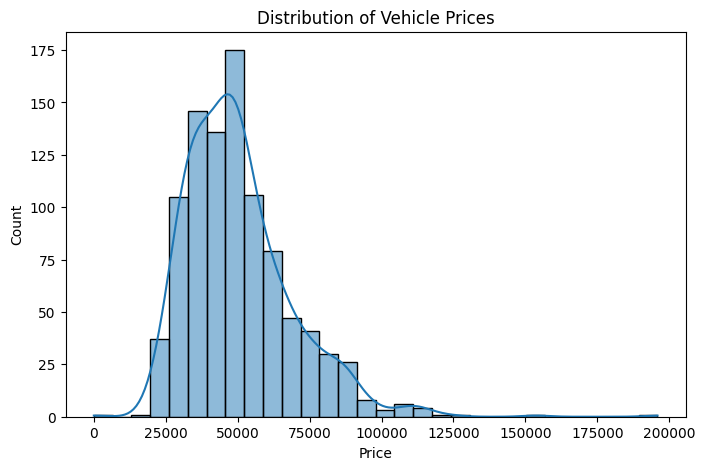

<Axes: title={'center': 'Count of Body Types (One-hot)'}>

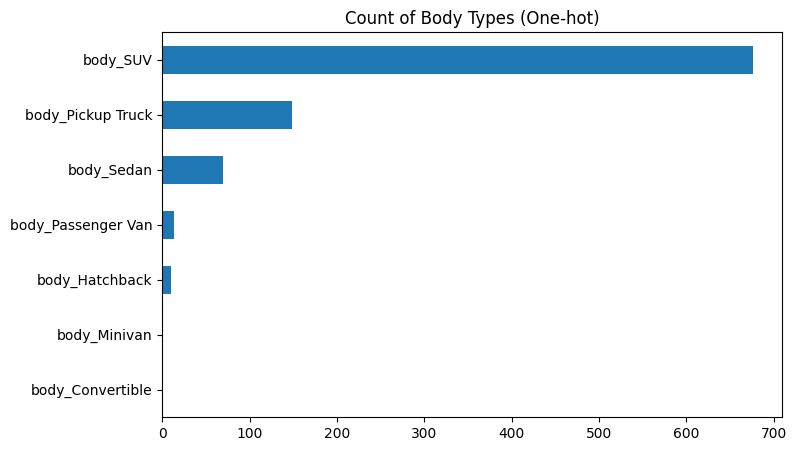

In [162]:
#univariate analysis

plt.figure(figsize=(8,5))
sns.histplot(df['price'],bins=30,kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()





# we are usng this because we have encoded so the original column got removed
# body_cols = [col for col in df.columns if col.startswith('body_')]

# # Step 2: Count how many vehicles belong to each body type
# body_counts = df[body_cols].sum().sort_values(ascending=False)

# # Step 3: Plot the counts
# plt.figure(figsize=(10, 5))
# sns.barplot(x=body_counts.index.str.replace('body_', ''), y=body_counts.values)
# plt.title('Count of Vehicles by Body Type')
# plt.xlabel('Body Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()4

df.filter(like='body_').sum().sort_values().plot(kind='barh', figsize=(8,5), title="Count of Body Types (One-hot)")


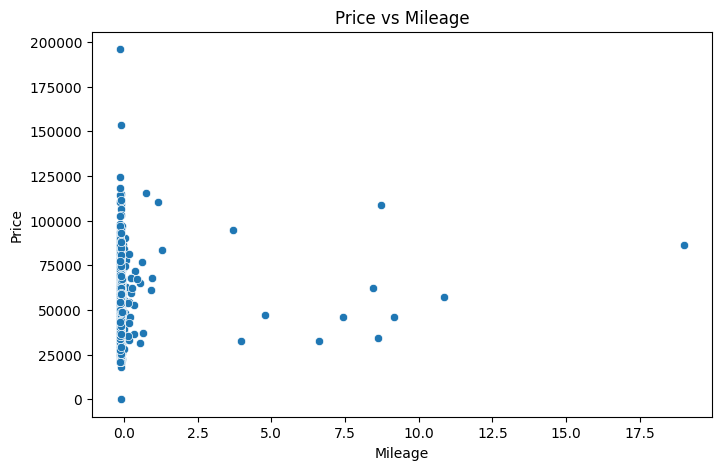

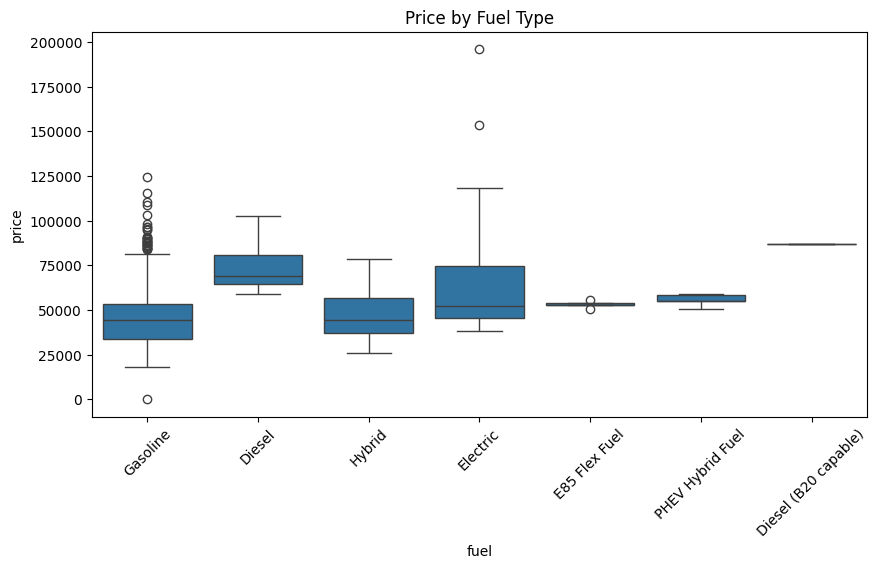

In [165]:
#Bivariate analysis

plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()



plt.figure(figsize=(10, 5))
sns.boxplot(x='fuel', y='price', data=df_original)  # if fuel wasn't one-hot encoded
plt.title('Price by Fuel Type')
plt.xticks(rotation=45)
plt.show()



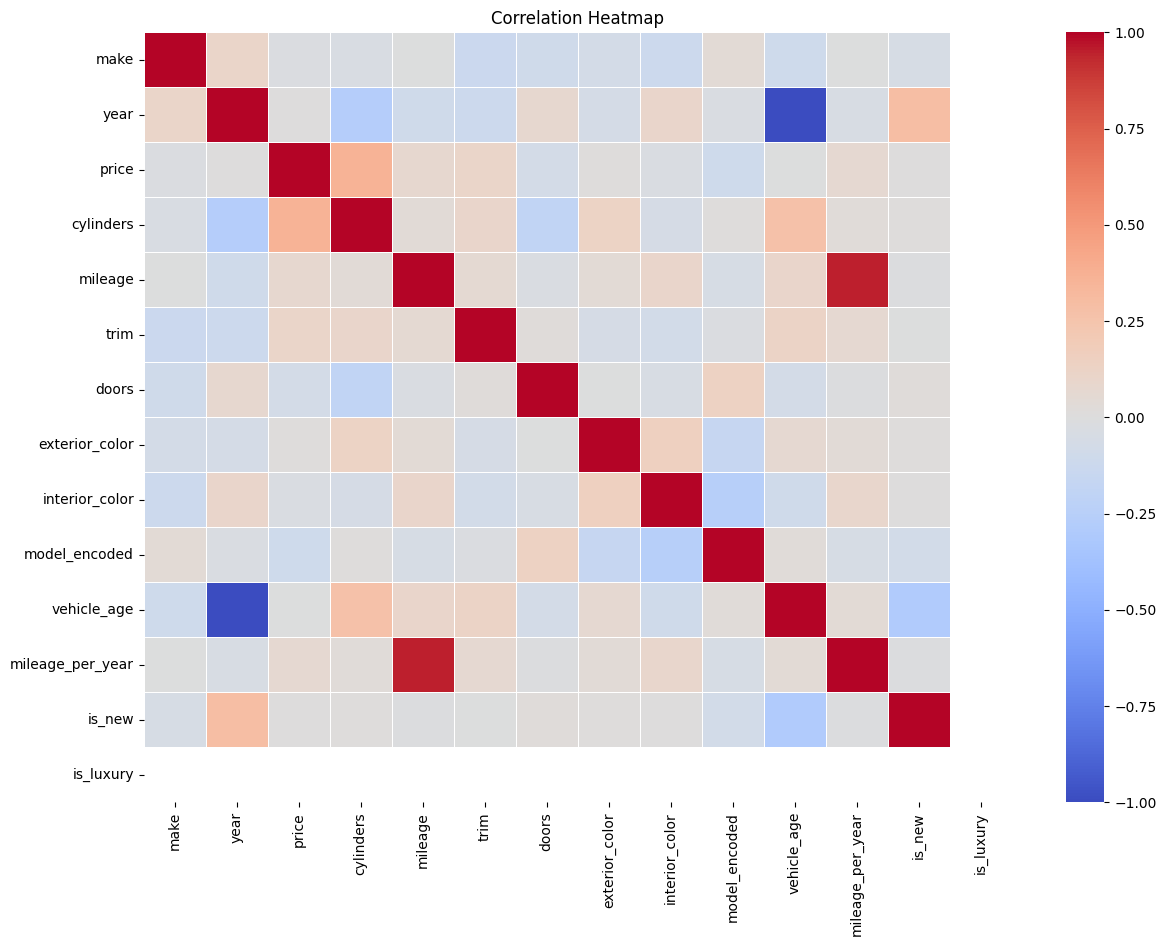

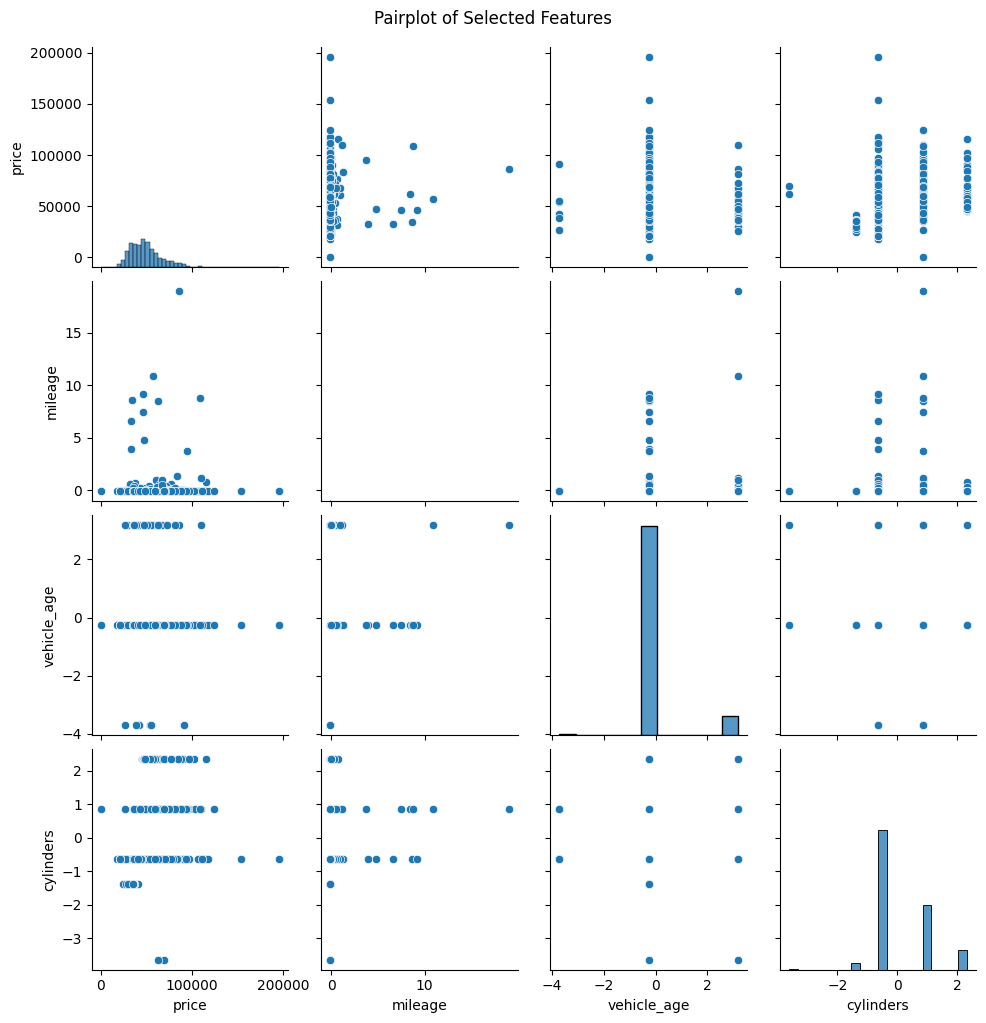

In [171]:
# Multivariate Analysis
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



sns.pairplot(df[['price', 'mileage', 'vehicle_age', 'cylinders']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

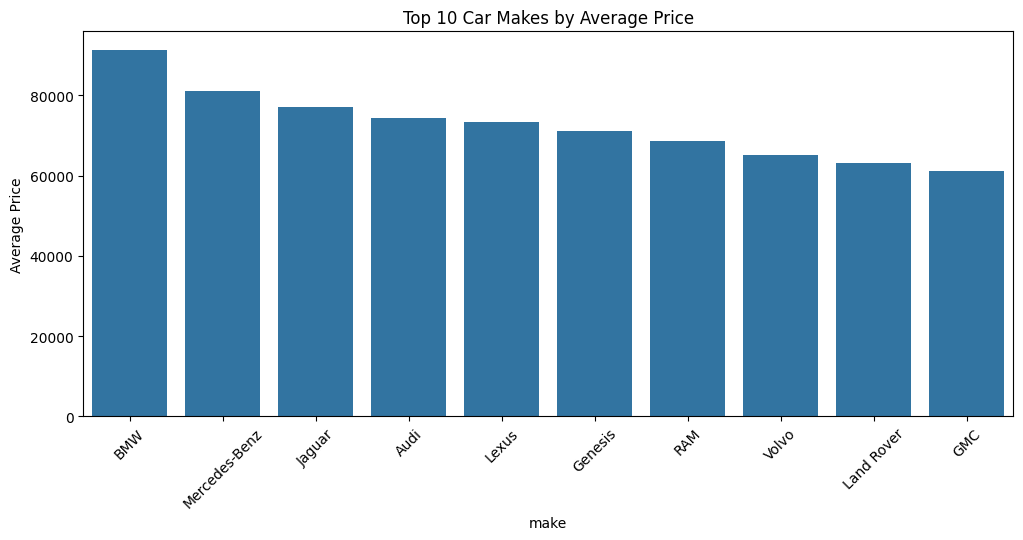

In [173]:
plt.figure(figsize=(12, 5))
grouped=df_original.groupby('make')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=grouped.index,y=grouped.values)
plt.xticks(rotation=45)
plt.title('Top 10 Car Makes by Average Price')
plt.ylabel('Average Price')
plt.show()

### Outlier Detection

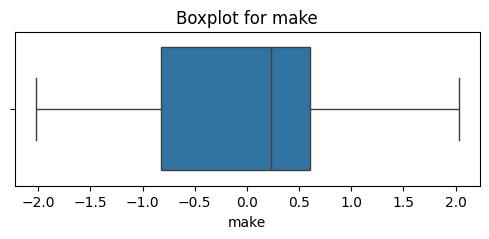

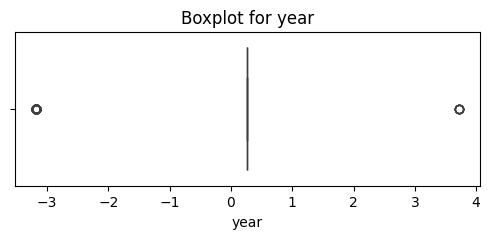

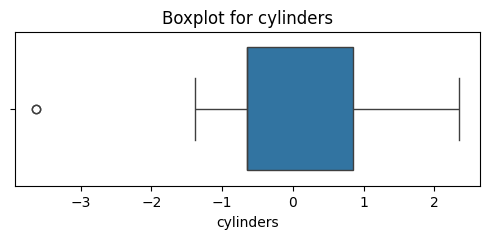

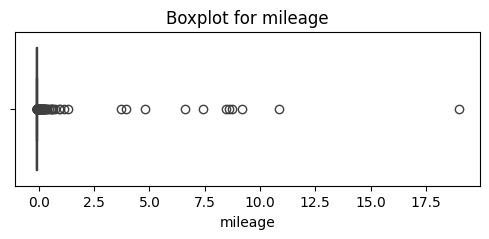

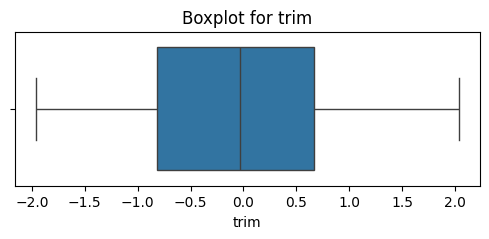

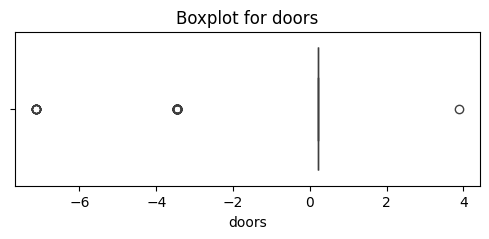

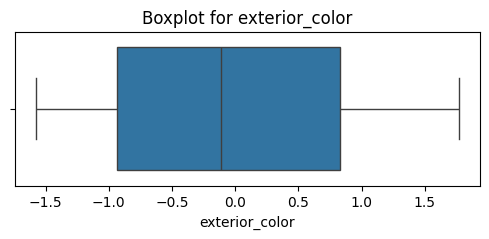

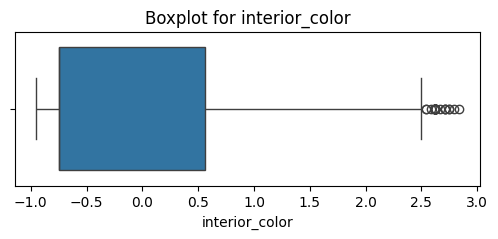

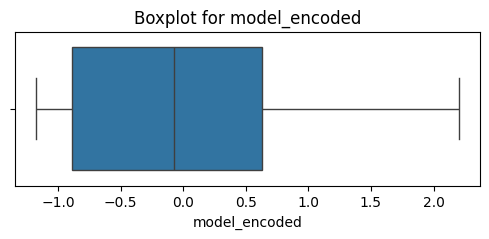

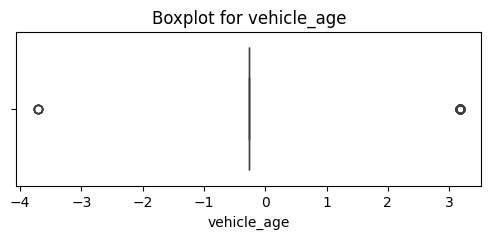

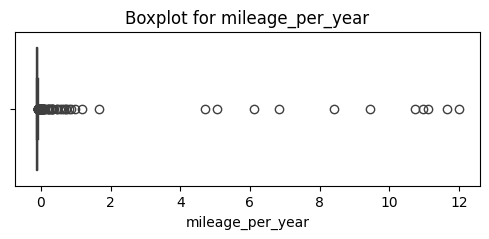

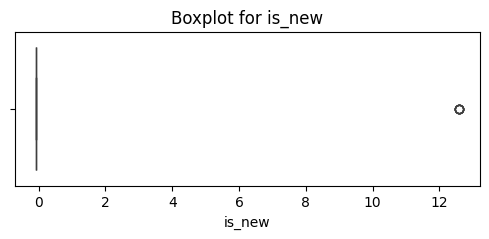

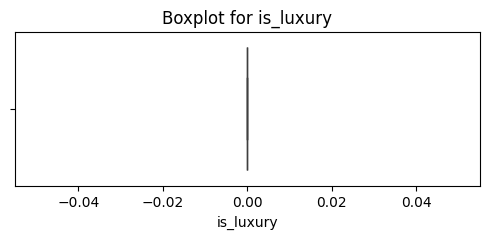

In [175]:
#Box plot

    
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [177]:
### IQR method
outlier_iqr={}
for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_iqr[col] = len(outliers)
    
pd.Series(outlier_iqr).sort_values(ascending=False)

mileage             109
mileage_per_year     87
year                 86
vehicle_age          86
interior_color       48
doors                47
is_new                6
cylinders             2
make                  0
trim                  0
exterior_color        0
model_encoded         0
is_luxury             0
dtype: int64

In [178]:
from scipy.stats import zscore
import numpy as np

z_outlier_count = {}

# Z-score threshold
threshold = 3

for col in numeric_cols:
    z_scores = zscore(df[col])
    outliers = df[np.abs(z_scores) > threshold]
    z_outlier_count[col] = outliers.shape[0]

# Show Z-score outliers
pd.Series(z_outlier_count).sort_values(ascending=False)


year                86
vehicle_age         86
doors               47
mileage             11
mileage_per_year    11
is_new               6
cylinders            2
trim                 0
make                 0
model_encoded        0
interior_color       0
exterior_color       0
is_luxury            0
dtype: int64

In [179]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(df[numeric_cols])

# Add a column showing outliers (-1 = outlier, 1 = normal)
df['outlier_iso'] = outliers

# Count how many outliers were found
df['outlier_iso'].value_counts()


outlier_iso
 1    907
-1     48
Name: count, dtype: int64

### Skewness

In [180]:
skewness=df[numeric_cols].skew().sort_values(ascending=False)
print("Highly skewed features (>|1|):\n")
print(skewness[abs(skewness)>1])

Highly skewed features (>|1|):

is_new              12.516587
mileage             12.300427
mileage_per_year     9.940554
vehicle_age          2.362850
interior_color       1.300111
year                -2.362850
doors               -4.961563
dtype: float64


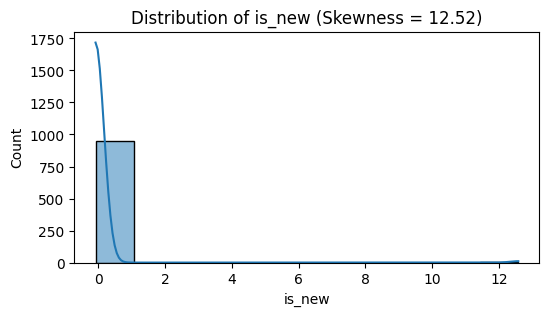

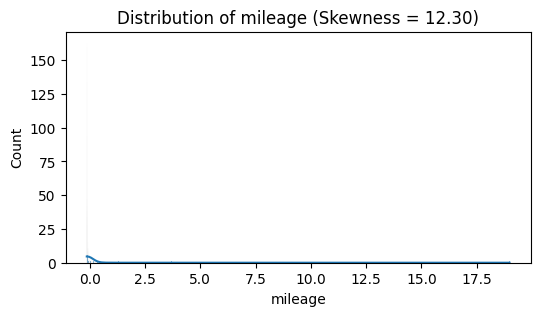

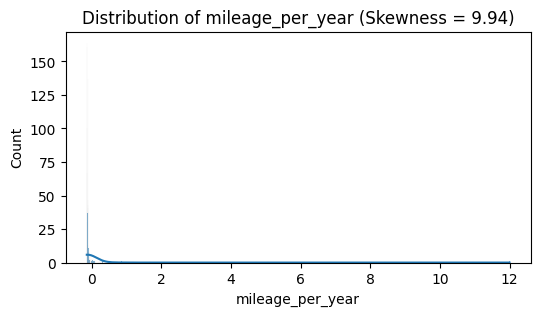

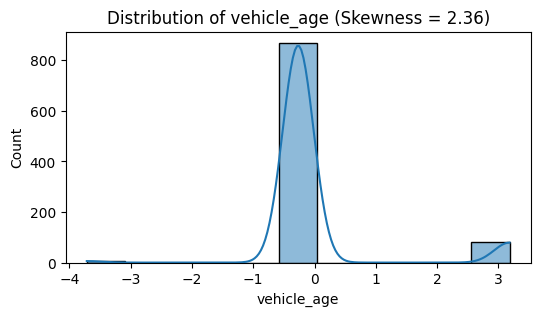

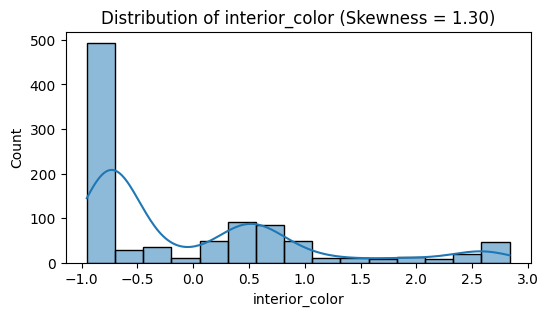

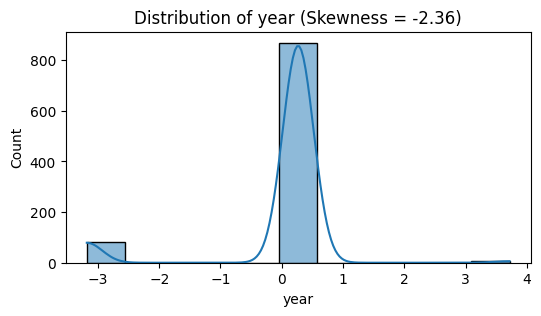

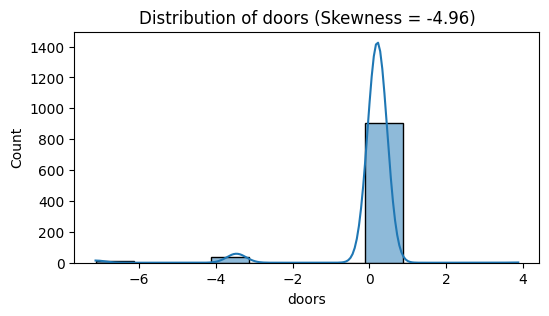

In [182]:
#Visualize Skewed Distributions

skewed_cols=skewness[abs(skewness)>1].index.tolist()
for col in skewed_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Skewness = {skewness[col]:.2f})')
    plt.show()

### Kurtosis

In [183]:
# Import from scipy
from scipy.stats import kurtosis

# Calculate kurtosis for numeric columns
kurt = df[numeric_cols].kurtosis().sort_values(ascending=False)
print("Kurtosis of numeric features:\n")
print(kurt)


Kurtosis of numeric features:

mileage             179.354268
is_new              154.989540
mileage_per_year    102.288355
doors                27.309407
vehicle_age           6.833993
year                  6.833993
interior_color        0.817362
cylinders             0.284368
is_luxury             0.000000
model_encoded        -0.536478
trim                 -0.804621
make                 -0.837744
exterior_color       -1.205685
dtype: float64


In [184]:
print("Highly peaked distributions (kurtosis > 3):\n")
print(kurt[kurt > 3])

Highly peaked distributions (kurtosis > 3):

mileage             179.354268
is_new              154.989540
mileage_per_year    102.288355
doors                27.309407
vehicle_age           6.833993
year                  6.833993
dtype: float64


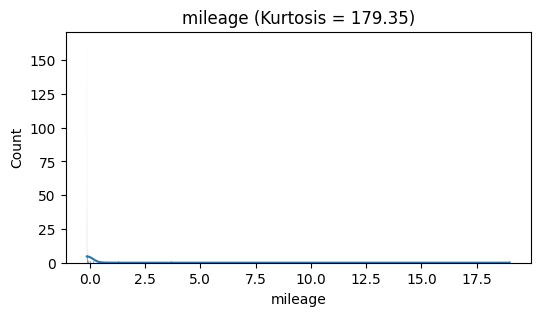

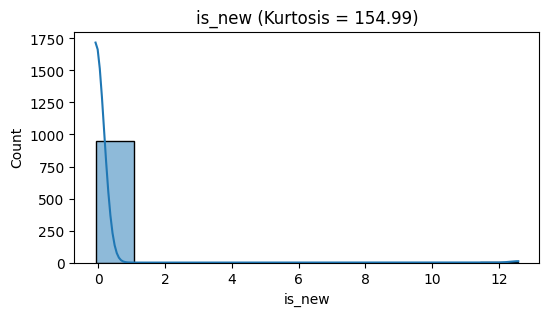

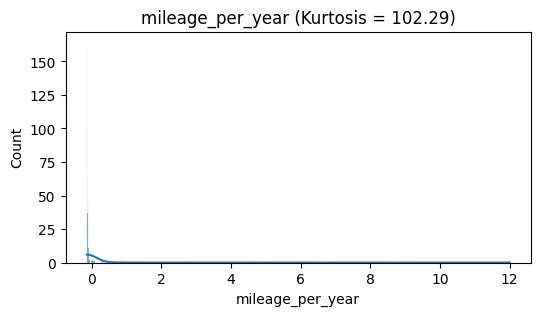

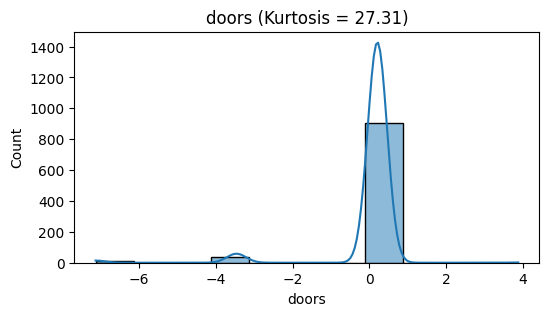

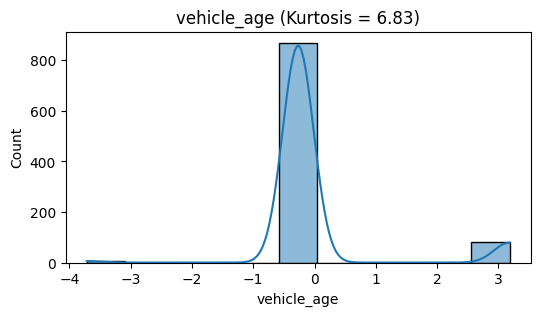

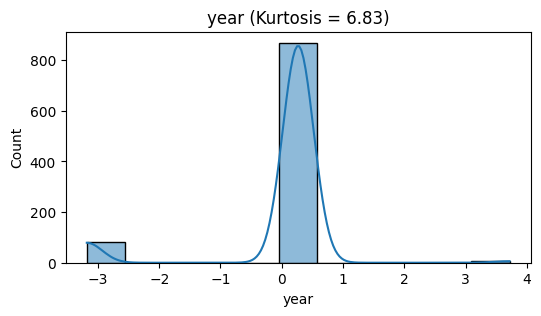

In [185]:
high_kurt_cols = kurt[kurt > 3].index.tolist()

for col in high_kurt_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} (Kurtosis = {kurt[col]:.2f})')
    plt.show()
